In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR

In [3]:
covid = pd.read_csv("covid_19_data.csv")

In [4]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type:",covid.dtypes)

Size/Shape of the dataset (13209, 8)
Checking for null values:
 SNo                   0
ObservationDate       0
Province/State     6382
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type: SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [6]:
covid.drop(["SNo"],1,inplace = True)

In [7]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [8]:
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":"sum","Deaths":'sum'})

In [9]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recoverd cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])


Basic Information
Total number of Confirmed cases around the world 1511104.0
Total number of Recoverd cases around the world 328661.0
Total number of Deaths cases around the world 88338.0
Total number of Active cases around the world 1094105.0
Total number of Closed cases around the world 240323.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

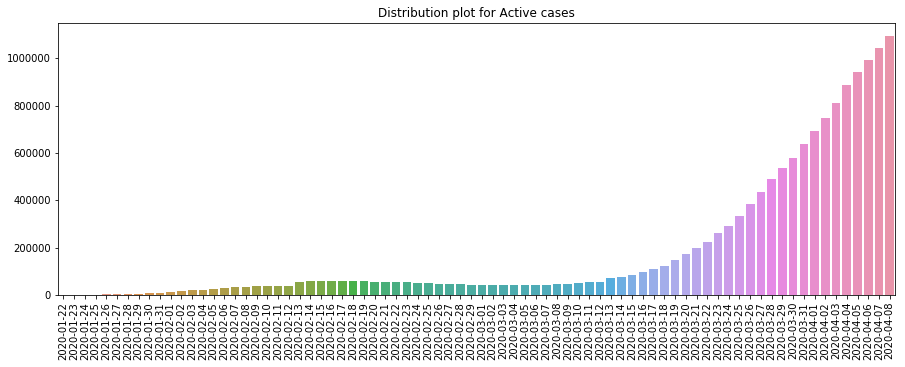

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Active cases")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text xticklabel objects>)

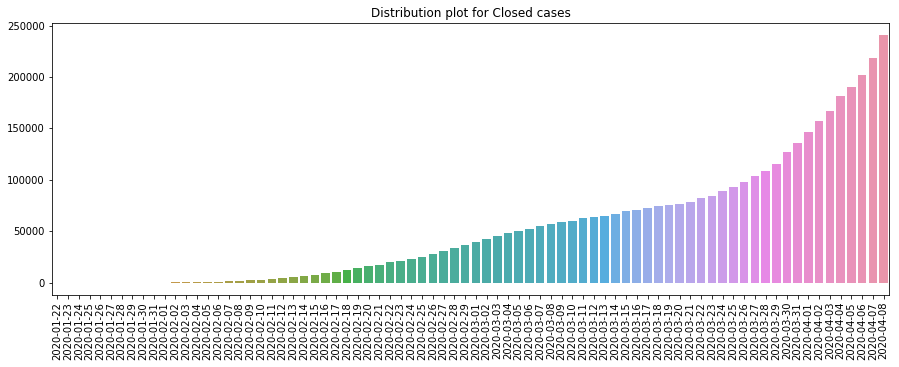

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly progress of different types of cases')

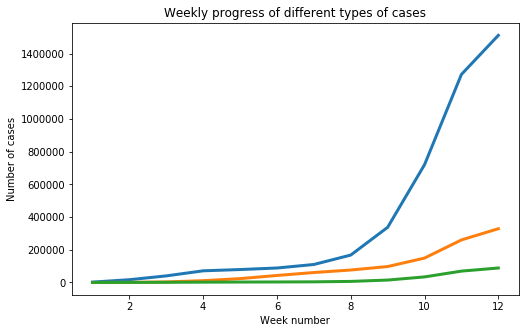

In [13]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
     weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
     weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
     weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
     week_num.append(w)
     w = w+1
plt.figure(figsize = (8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly progress of different types of cases")

C:\Users\bansa\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


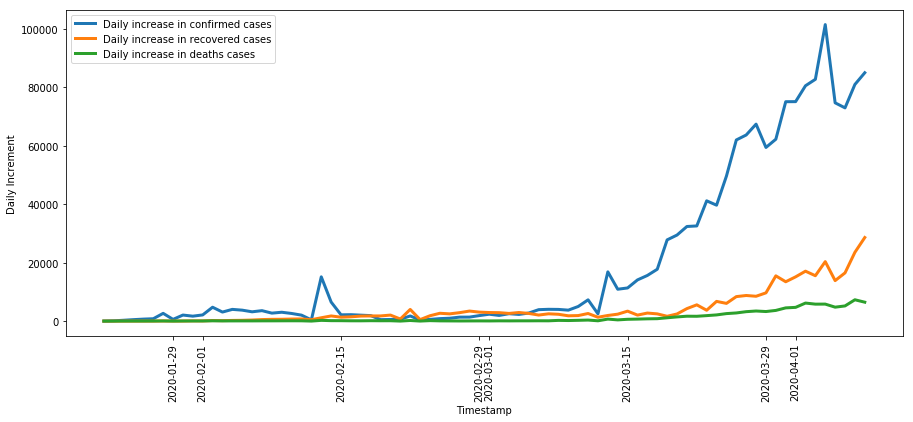

In [14]:
plt.figure(figsize = (15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth = 3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth = 3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in deaths cases",linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.xticks(rotation=90)
plt.legend()

In [15]:
print("Average increase in n7umber of Confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in n7umber of Recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in n7umber of Deaths cases everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))



Average increase in n7umber of Confirmed cases everyday 19366.0
Average increase in n7umber of Recovered cases everyday 4213.0
Average increase in n7umber of Deaths cases everyday 1132.0


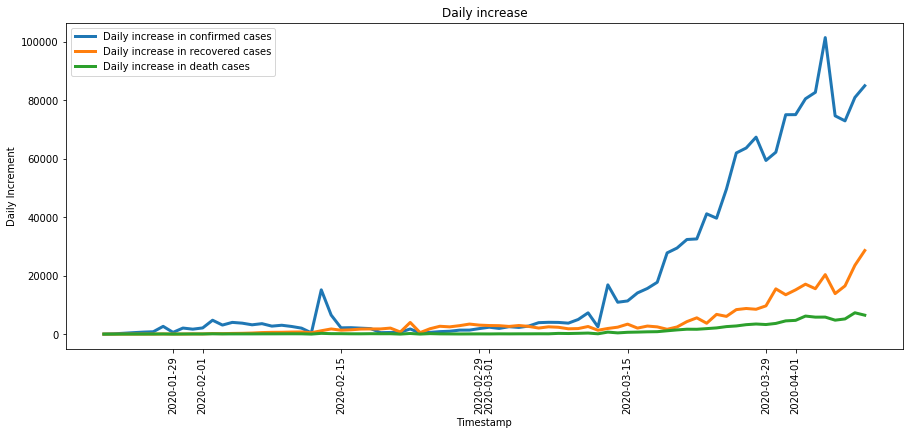

In [16]:
plt.figure(figsize = (15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth = 3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth = 3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase")
plt.xticks(rotation=90)
plt.legend()

In [17]:
print("Average increase in number of Confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))


Average increase in number of Confirmed cases everyday 19366.0
Average increase in number of Recovered cases everyday 4213.0
Average increase in number of Deaths cases everyday 1132.0


In [31]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending = false)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


NameError: name 'false' is not defined

NameError: name 'countrywise' is not defined

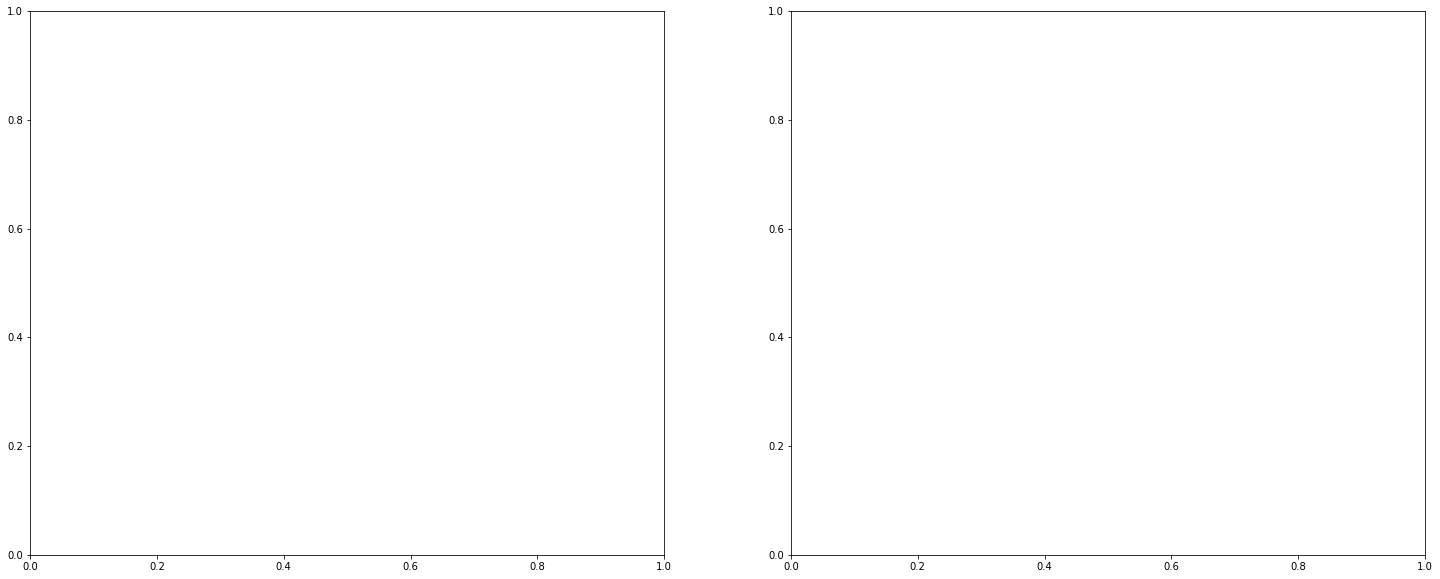

In [32]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top15 countries as per number of confimred cases")
sns.barplot(x = top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top15 countries as per number of death cases")

In [33]:
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Actvie Cases:",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])


Confirmed    5916.0
Recovered     506.0
Deaths        178.0
Name: 2020-04-08 00:00:00, dtype: float64
Total Actvie Cases: 5232.0
Total Closed cases 684.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

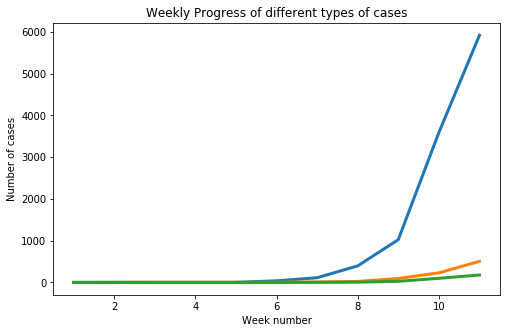

In [34]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w = w+1
plt.figure(figsize = (8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth = 3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [35]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed cases to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed cases to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed cases to India")
print("It took",datewise_China[(datewise_China["Confirmed"]>0)&(datewise_China["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed cases to India")


It took 70 days in India to reach 5916.0 Confirmed Cases
It took 37 days in Italy to reach number of Confirmed cases to India
It took 55 days in US to reach number of Confirmed cases to India
It took 42 days in Spain to reach number of Confirmed cases to India


NameError: name 'datewise_China' is not defined

In [36]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores = []


In [ ]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree = 6,kernel= 'poly',epsilon=0.01)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))


C:\Users\bansa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bansa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [ ]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f' %x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LINEAR REGRSN","SVM PREDICTION"])
model_predictions.head(10)
